<a href="https://colab.research.google.com/github/roshank1605A04/SECOM-Detecting-Defected-Items/blob/master/SECOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting the drive on colabs**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Semi Conductor  Manufacturing Data Set**

  The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1). This is a 1:14 proportion. In this work not only a feature selection method for extracting the post discriminative sensors is proposed, but also boosting and data generation techniques are devised to deal with highly imbalance between the pass and fail cases. 

In [0]:
!ls 'drive/My Drive/Projects/practice/SECOM/secom.csv'

'drive/My Drive/Projects/practice/SECOM/secom.csv'


**Importing basic Libraries**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [5]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 6A4B-D448

 Directory of D:\Shubham\Data science Project\piyush_semi_cond_project\repo\SECOM-Detecting-Defected-Items

04-03-2023  08:55 PM    <DIR>          .
04-03-2023  08:24 PM    <DIR>          ..
04-03-2023  08:24 PM    <DIR>          .github
04-03-2023  08:24 PM             1,307 .gitignore
04-03-2023  08:39 PM    <DIR>          .ipynb_checkpoints
04-03-2023  08:24 PM             3,435 CODE_OF_CONDUCT.md
04-03-2023  08:24 PM                49 CONTRIBUTING.md
04-03-2023  08:24 PM            35,823 LICENSE
04-03-2023  08:24 PM           982,349 outlier-detection-tutorial.ipynb
04-03-2023  08:24 PM            24,963 Outliers_Detection.ipynb
04-03-2023  08:24 PM               128 pull_request-template.md
04-03-2023  08:24 PM             1,893 README.md
04-03-2023  08:34 PM    <DIR>          repo_venv
04-03-2023  08:55 PM         2,902,894 SECOM.ipynb
04-03-2023  08:24 PM         6,055,583 uci-secom.csv
              10 File(s

In [6]:
data = pd.read_csv(r'uci-secom.csv')

print(data.shape)

(1567, 592)


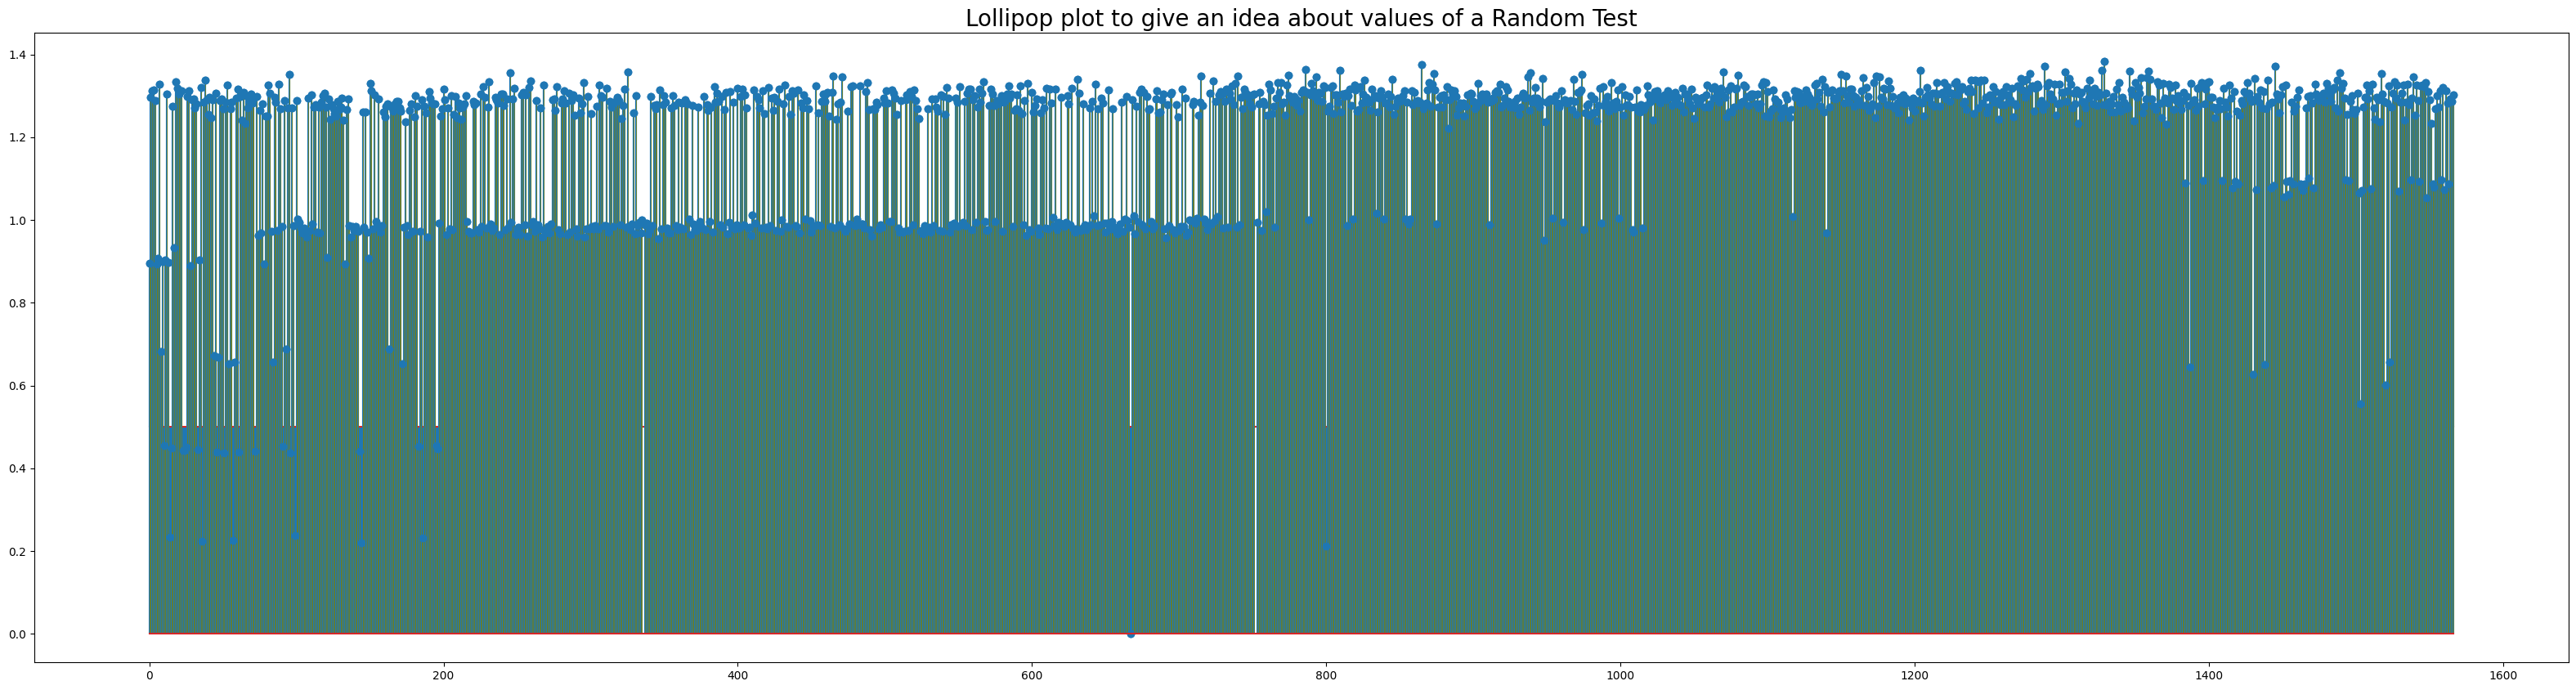

In [7]:
# create data
values = data['25']
 
plt.rcParams['figure.figsize'] = (40, 10)  
# position is customized with the bottom argument
plt.stem(values, markerfmt=' ', bottom=0.5)

# note that this works as well
plt.stem(values, basefmt=" ")
 
plt.title('Lollipop plot to give an idea about values of a Random Test', fontsize = 20)
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )  
plt.show()

**Exploratory Data Analysis**

In [8]:
data.sample(5)

Time        0        1          2          3       4  \
795   2008-11-09 22:07:00  3069.31  2448.37  2174.7555  1206.3506  1.4202   
1237  2008-02-10 08:57:00  3013.73  2567.76  2172.8111   969.3436  1.2736   
214   2008-08-16 06:52:00  3075.76  2491.55  2185.9333  1659.6962  1.6290   
1033  2008-09-23 12:31:00  3093.12  2500.90  2219.7667  2086.4710  1.3381   
1265  2008-03-10 04:49:00  3028.40  2485.82  2173.4889  1145.7970  0.9402   

          5         6       7       8  ...       581     582     583     584  \
795   100.0  104.2622  0.1246  1.4372  ...   66.1687  0.4994  0.0099  0.0028   
1237  100.0  102.7367  0.1243  1.4889  ...       NaN  0.5050  0.0229  0.0046   
214   100.0   98.6822  0.1227  1.4510  ...       NaN  0.4968  0.0115  0.0032   
1033  100.0   98.8900  0.1234  1.4117  ...  106.5582  0.5038  0.0133  0.0040   
1265  100.0  104.0556  0.1247  1.3089  ...       NaN  0.5044  0.0166  0.0043   

         585     586     587     588       589  Pass/Fail  
795   1.9755  0.0406  0.0268  0.0091   66.1687          1  
1237  4.5318  0.0144  0.0080  0.0023   55.8468         -1  
214   2.3200  0.0298  0.0116  0.0039   38.9781         -1  
1033  2.6341  0.0292  0.0311  0.0105  106.5582         -1  
1265  3.2817 -0.0047  0.0134  0.0035  286.1303         -1  

[5 rows x 592 columns]

In [9]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [11]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [12]:
data.isnull().any().any()

True

In [13]:

# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros

data = data.replace(np.NaN, 0)
data.isnull().any().any()

False

**Data Visualization**

C:\Users\shubh\AppData\Local\Temp\ipykernel_11620\4078249125.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['1'])


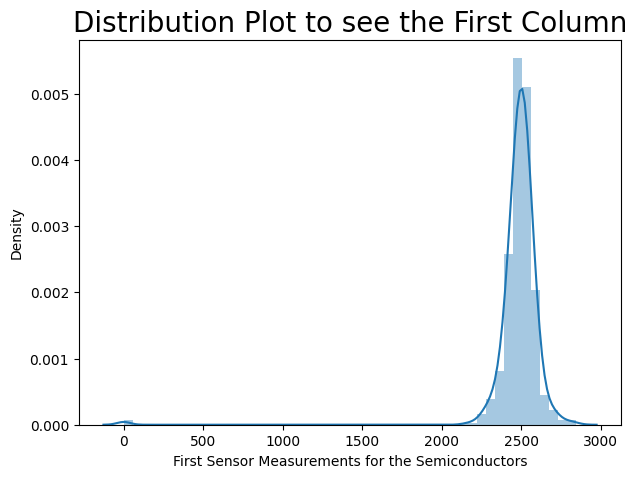

In [14]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['1'])
plt.title('Distribution Plot to see the First Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_11620\231789398.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['520'])


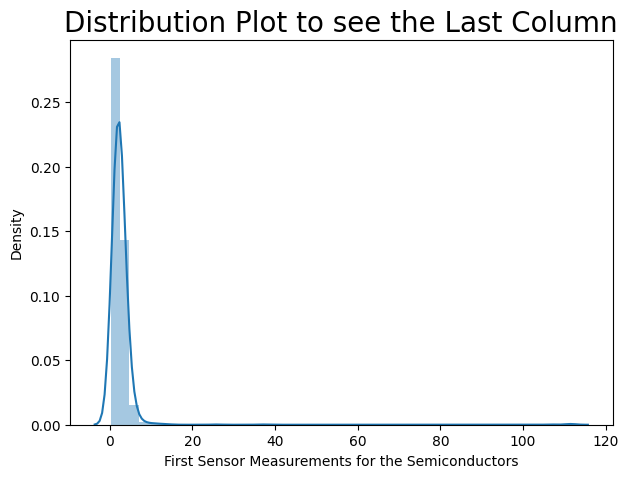

In [15]:
# distribution plot to see the range of value in the second column

plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(data['520'])
plt.title('Distribution Plot to see the Last Column', fontsize = 20)
plt.xlabel('First Sensor Measurements for the Semiconductors')
plt.show()

In [16]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

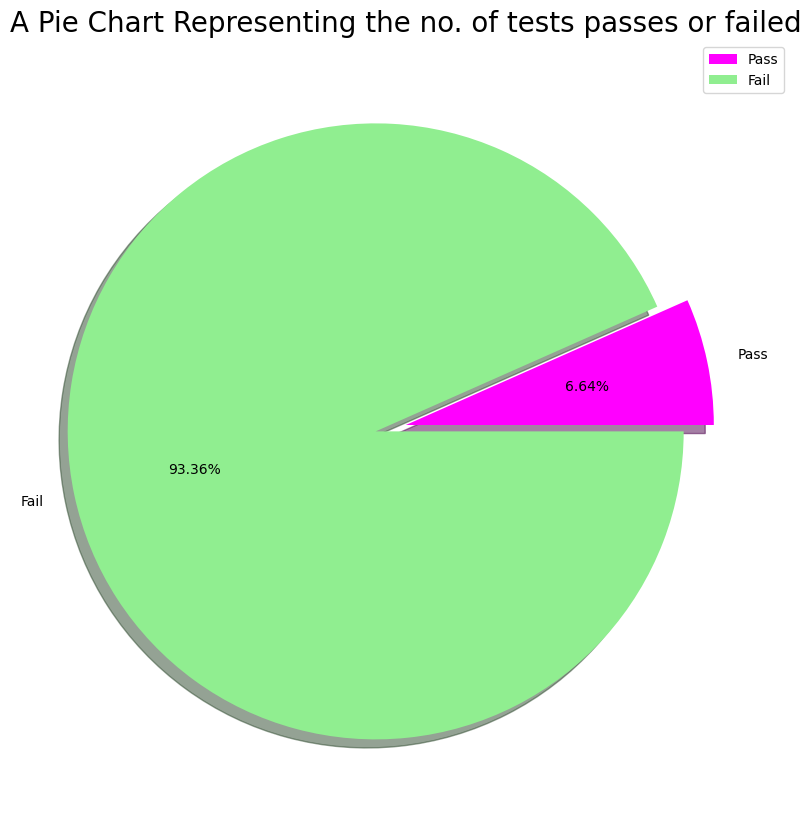

In [17]:
# pie chart

labels = ['Pass', 'Fail']
size = [104, 1463]
colors = ['magenta', 'lightgreen']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing the no. of tests passes or failed', fontsize = 20)
plt.legend()
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_11620\2162583158.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


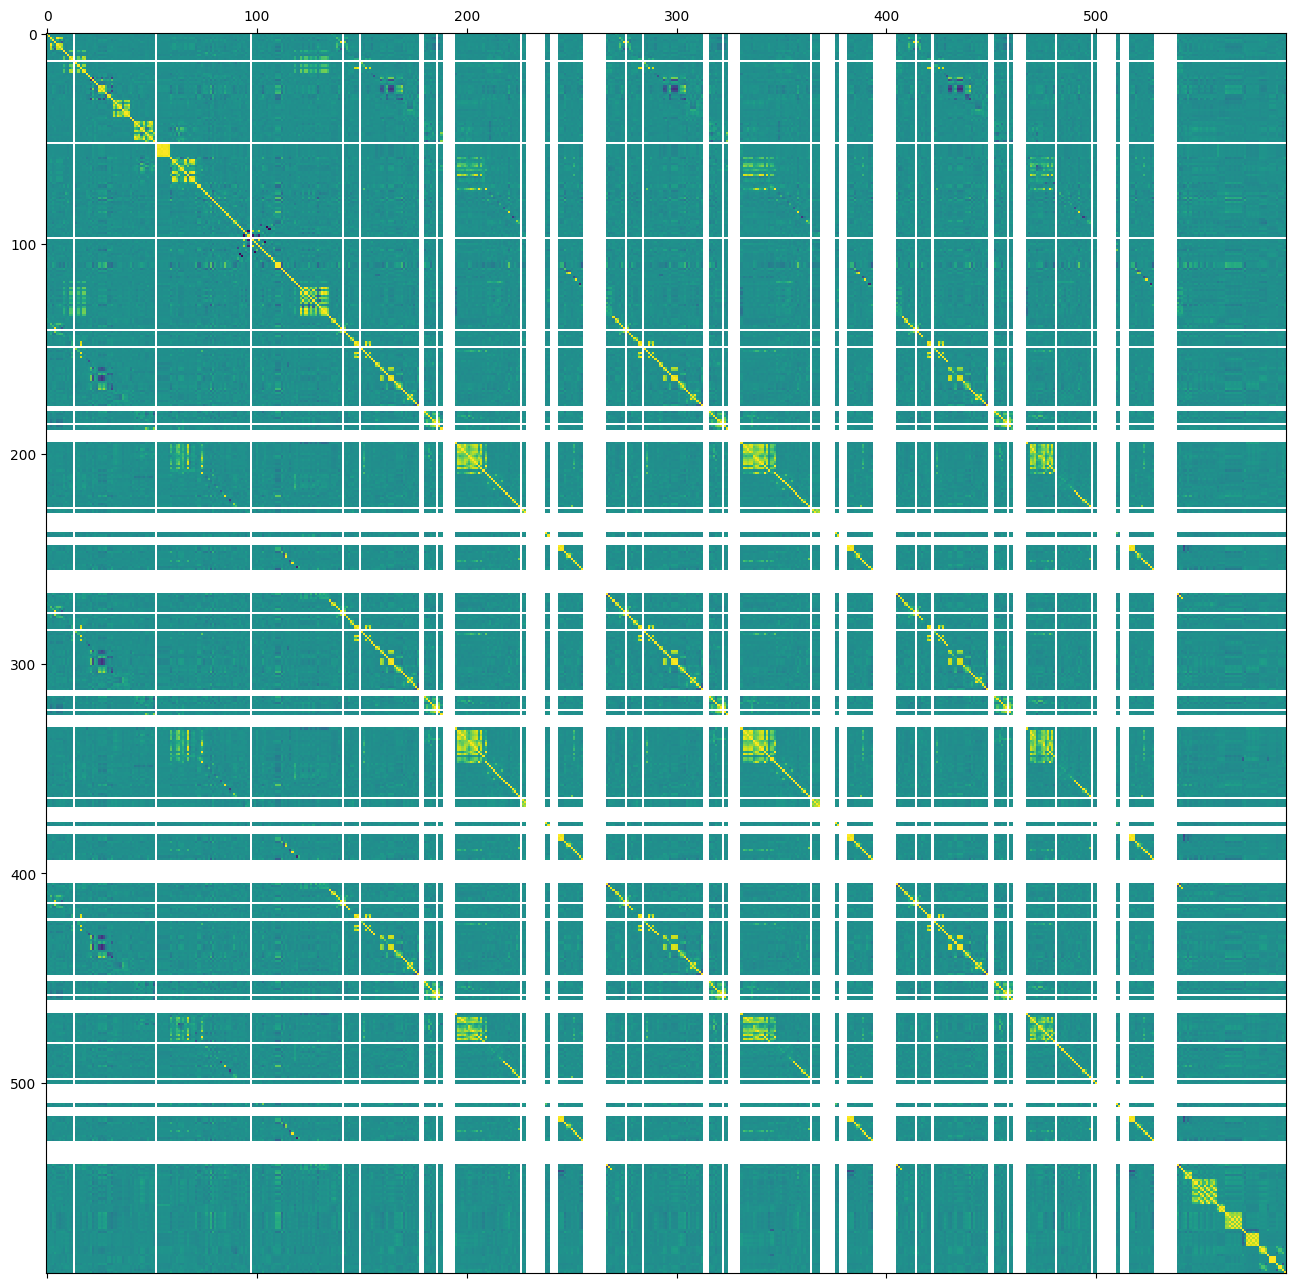

In [18]:
# matplot 

plt.rcParams['figure.figsize'] = (25, 25)
plt.matshow(data.corr())

In [20]:
# Heatmap

fig, axis = plt.subplots(figsize = (100, 100))

corr = data.corr()

sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool_), cmap = sns.diverging_palette(220, 10, as_cmap = True), ax = axis)

C:\Users\shubh\AppData\Local\Temp\ipykernel_11620\1750465938.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

**Data Pre-processing**

In [21]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [22]:
# separating the dependent and independent data

x = data.iloc[:,:590]
y = data.iloc[:, 590]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


In [24]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 590)
shape of x_test:  (314, 590)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [25]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Before Sampling**

**Modelling without PCA**

**Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.9585987261146497


<Axes: title={'center': 'Confusion Matrix for Random Forest Classifer'}>

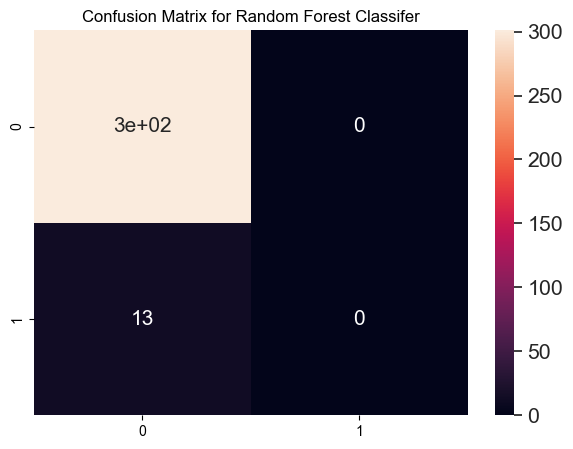

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Random Forest Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [34]:
np.float_(1/13)

0.07692307692307693

In [35]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(1/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  7.6923076923076925 %


**Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.8949044585987261


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

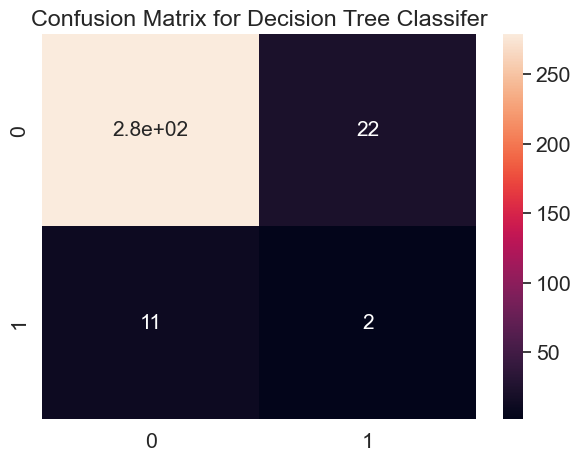

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [38]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(1/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  7.6923076923076925 %


**Support Vector Machines**

In [39]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9337589784517158
Testing Accuarcy:  0.9585987261146497


<Axes: title={'center': 'Confusion Matrix for Support Vector Classifer'}>

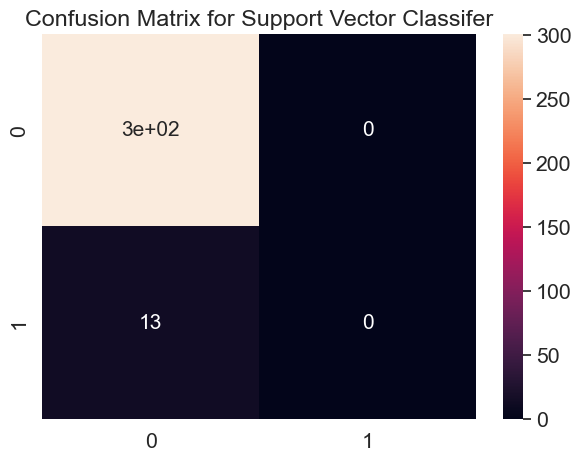

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Support Vector Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [42]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**Naive Bayes Classifier**

In [43]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing = 5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.902633679169992
Testing Accuarcy:  0.9140127388535032


<Axes: title={'center': 'Confusion Matrix for Naive Bayes Classifer'}>

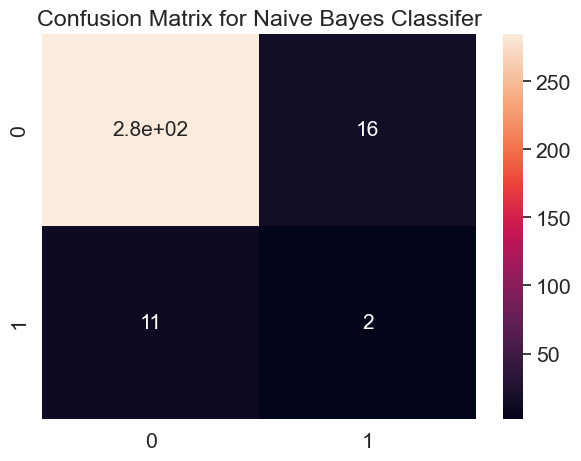

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Naive Bayes Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [45]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(2/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  15.384615384615385 %


**AdaBoost Classifier**

In [46]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9792498004788508
Testing Accuarcy:  0.9363057324840764


<Axes: title={'center': 'Confusion Matrix for Ada Boost Classifer'}>

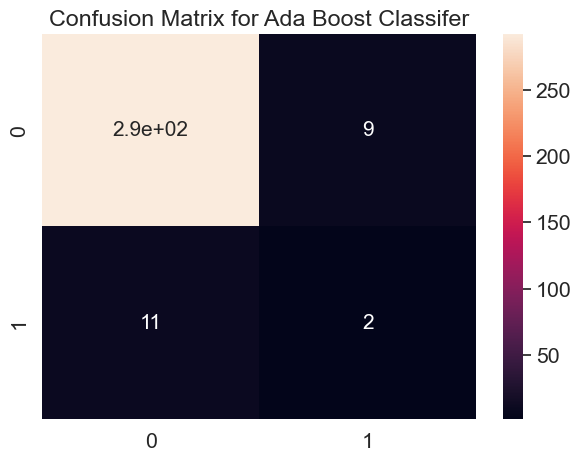

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Ada Boost Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [48]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(2/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  15.384615384615385 %


**Xg Boost**

In [73]:
train=[]
for items in y_train.iteritems():
    if items[-1] == -1:
        train.append(tuple([items[0],0]))
    else:
        train.append(tuple(items))
        

C:\Users\shubh\AppData\Local\Temp\ipykernel_11620\1164141223.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for items in y_train.iteritems():


In [77]:
y_train.replace(to_replace=-1,value=0,inplace=True)

In [81]:
y_train[:10]

1476    0
218     1
1137    0
1533    0
1092    0
295     0
526     0
670     0
557     0
987     0
Name: Pass/Fail, dtype: int64

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [82]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.0


<Axes: title={'center': 'Confusion Matrix for Xg Boost Classifer'}>

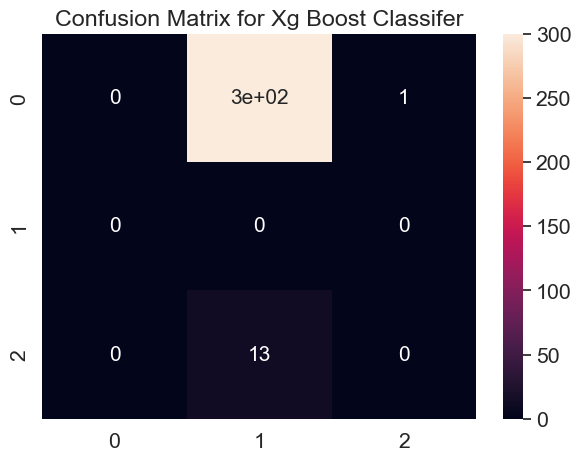

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Xg Boost Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [85]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**K Nearest Neighbors**

In [86]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  0.9297685554668795
Testing Accuarcy:  0.0


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

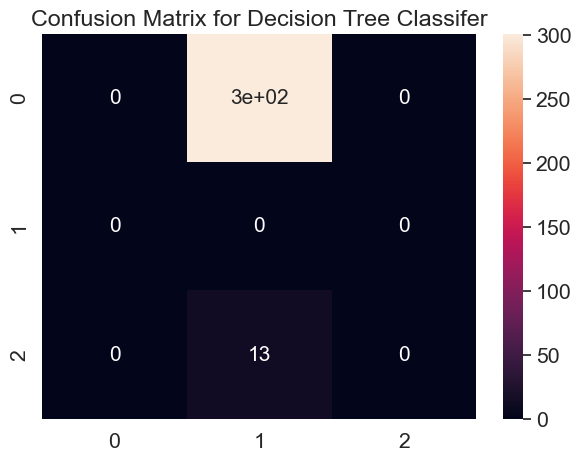

In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [89]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(0/13)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  0.0 %


**Visualization of Classification v/s Anamoly Detection Accuracy**

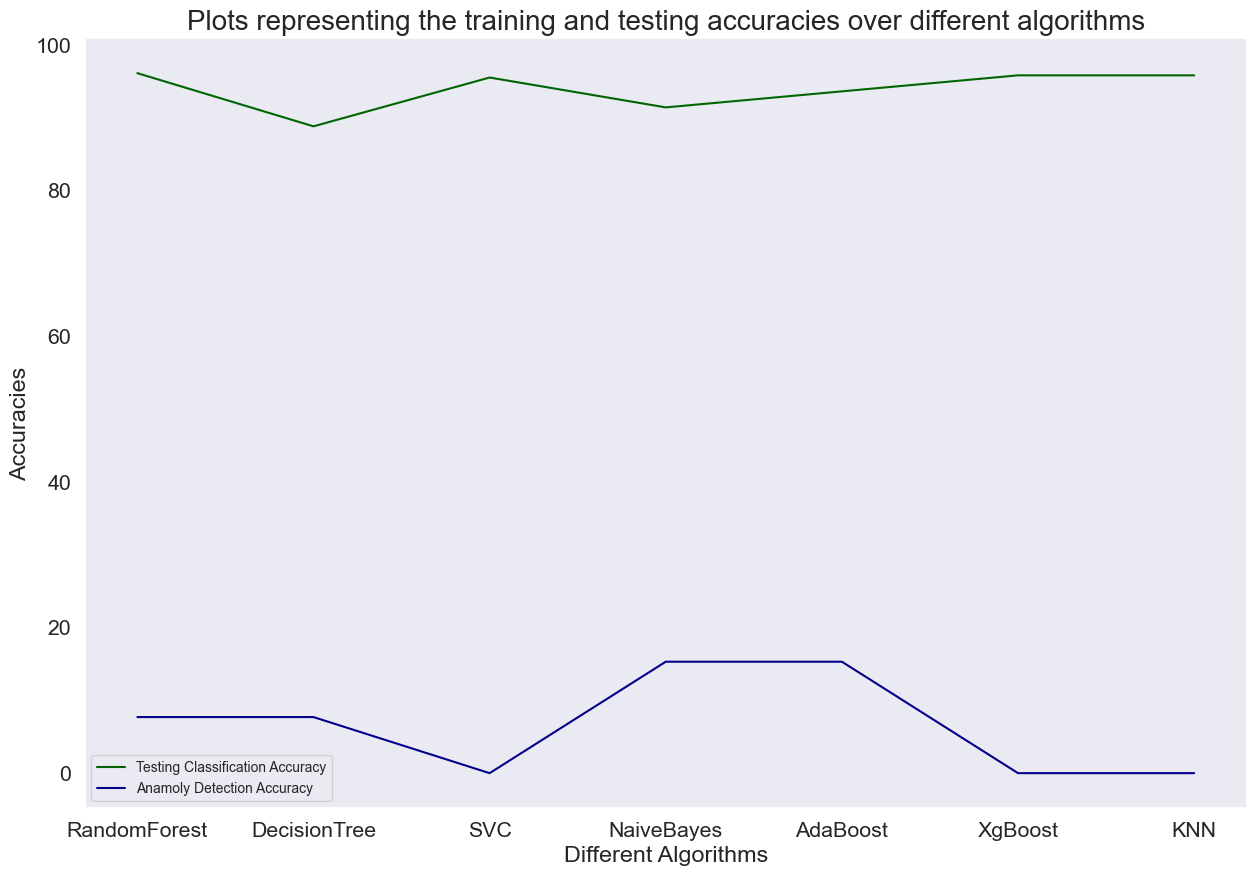

In [90]:
# plotting the train test results for all the 9 algorithms

test = [96.1, 88.8, 95.5, 91.4, 93.6, 95.8, 95.8]
anamoly = [7.7, 7.7, 0, 15.3, 15.3, 0, 0]

plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Plots representing the training and testing accuracies over different algorithms', fontsize = 20)
plt.plot(range(0, 7), test, c = 'darkgreen', )
plt.plot(range(0, 7), anamoly, c = 'darkblue',)
plt.xlabel('Different Algorithms')
plt.ylabel('Accuracies')
labels = "Testing Classification Accuracy", "Anamoly Detection Accuracy" 

n_groups = 7
index = np.arange(n_groups)

plt.xticks(index, ('RandomForest', 'DecisionTree', 'SVC', 'NaiveBayes', 'AdaBoost', 'XgBoost', 'KNN'))
plt.legend(labels, loc = 'best', fontsize = 10)
plt.show()

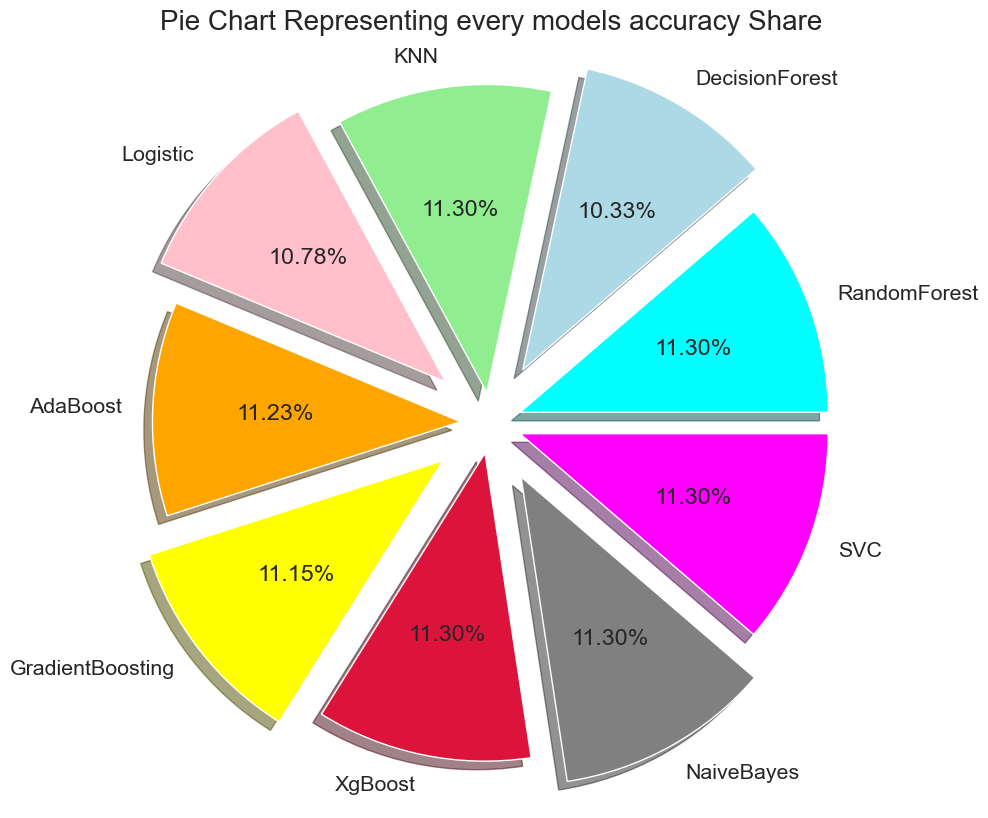

In [91]:
# visualizing each model's performance

labels = "RandomForest", "DecisionForest", "KNN", "Logistic", "AdaBoost", "GradientBoosting", "XgBoost", "NaiveBayes", "SVC"
# size corresponds to the test accuracies  of each model
size = [97.4, 89, 97.4, 92.9, 96.8, 96.1, 97.4, 97.4, 97.4]
colors = ['cyan', 'lightblue', 'lightgreen', 'pink', 'orange', 'yellow', 'crimson', 'gray', 'magenta']
explode = [0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1]

plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%') 
plt.title('Pie Chart Representing every models accuracy Share', fontsize = 20)
plt.axis('off')
#plt.legend(labels, loc = 'upper right')
plt.show()

**After Sampling of the Dataset**

**Under-Sampling**

In [92]:
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [93]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [94]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [95]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [96]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [97]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [98]:

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [99]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [100]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Random Forest**

In [143]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.7380952380952381


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

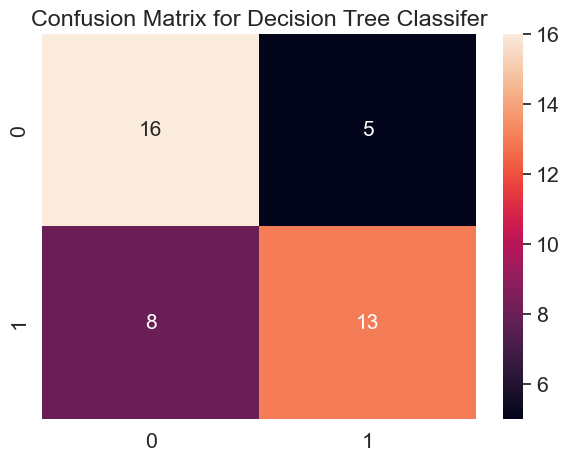

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

**Anamoly Detection Accuracy**

In [109]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [110]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.64 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.64')

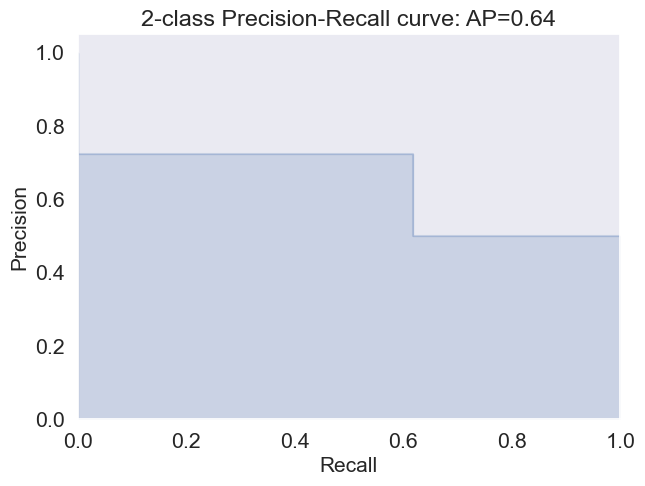

In [115]:
from sklearn.metrics import precision_recall_curve

# from sklearn.utils.fixes import signature
from funcsigs import signature
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))


**Decision Tree**

In [116]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.7619047619047619


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

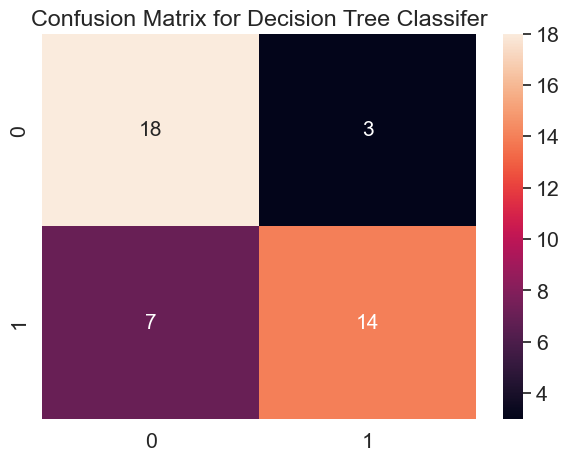

In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [118]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(13/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  59.09090909090909 %


In [119]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.72 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.72')

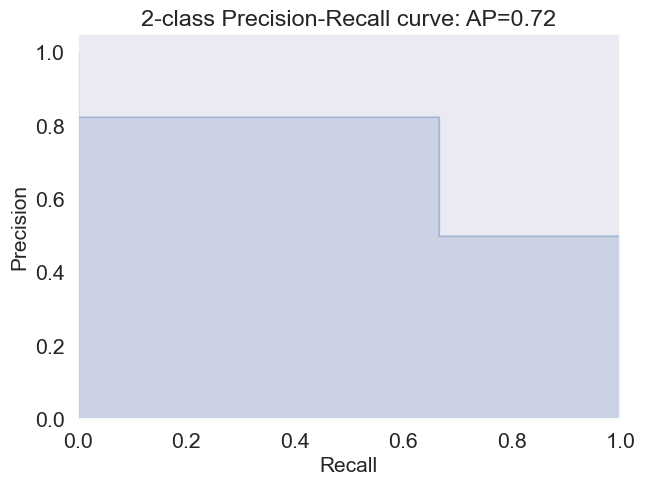

In [121]:
from sklearn.metrics import precision_recall_curve
# from sklearn.utils.fixes import signature
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))

 **Xg- Boost Classifier**

In [124]:
y_train.replace(to_replace=-1,value=0,inplace=True)

In [125]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Testing Accuracy: ", model.score(x_test, y_test))

Testing Accuracy:  0.47619047619047616


In [126]:
# finding the AUPRC Score
# PR AUC is the area under the curve where x is recall and y is precision.

from sklearn.metrics import average_precision_score

probabilities = model.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

AUPRC = 0.9074620983154145


<Axes: title={'center': 'Confusion Matrix for Decision Tree Classifer'}>

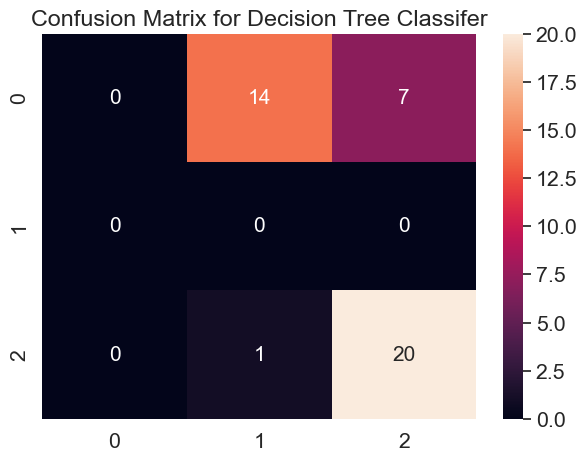

In [127]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Decision Tree Classifer')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [128]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(17/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  77.27272727272727 %


In [129]:
from sklearn.model_selection import learning_curve

weights = (y == 0).sum()/(1.0*(y == -1).sum())
trainSizes, trainScores, crossValScores = learning_curve(XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4), 
                                                         x_train, y_train, scoring = 'average_precision')


[00:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:01:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "s

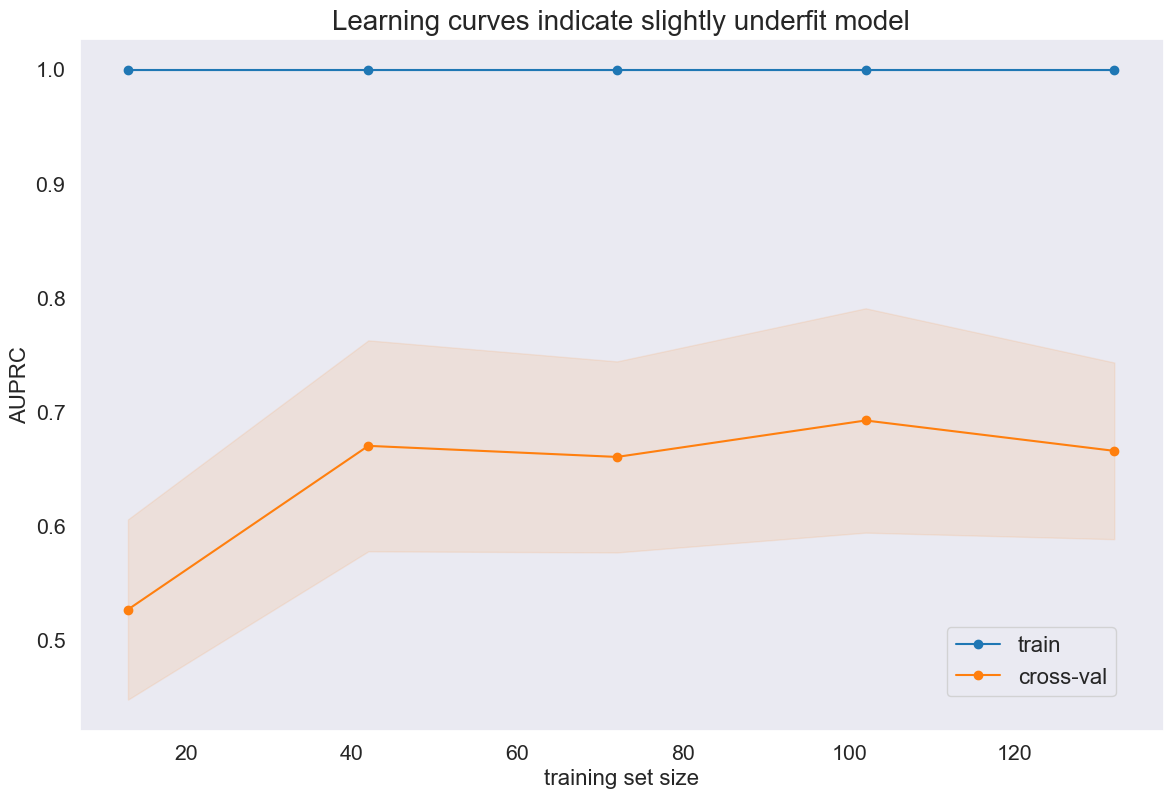

In [177]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd, crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])


plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

**Comparison of Results Obtained by Under Sampling**

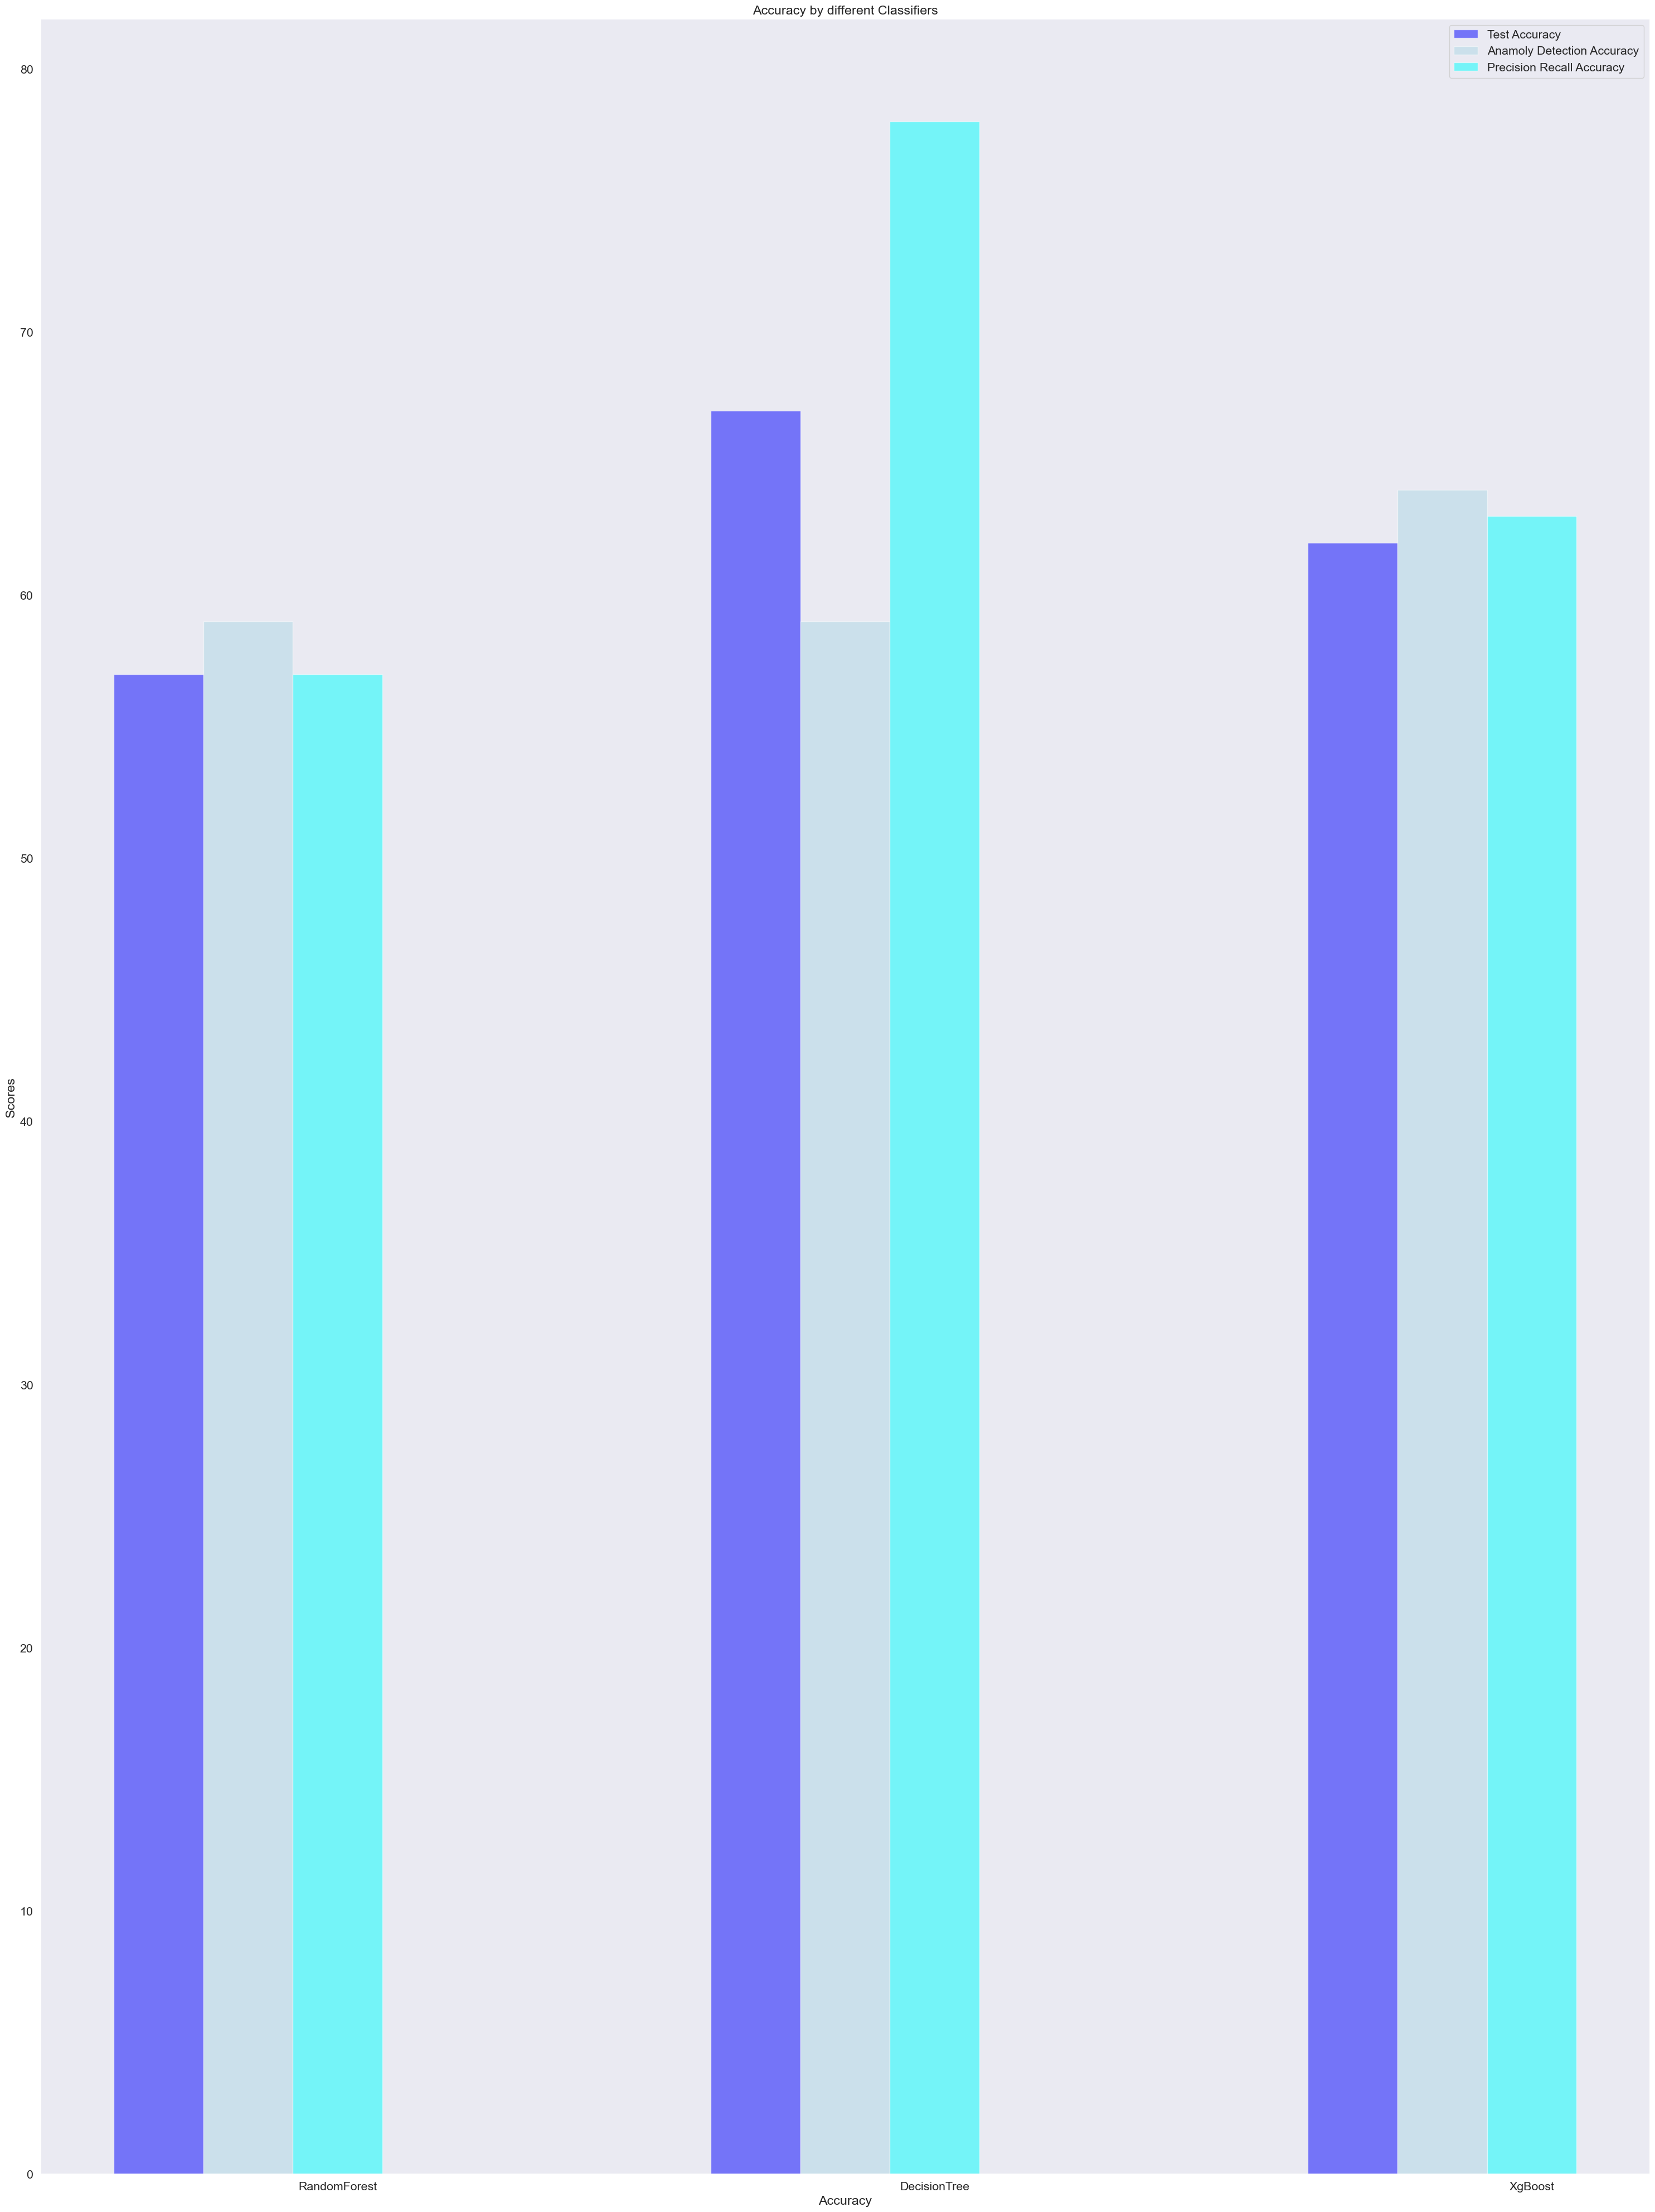

In [178]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
Test_Accuracy = (57, 67, 62 )
Anamoly_Detection_Accuracy = (59, 59, 64)
Precision_Recall_Accuracy = (57, 78, 63)

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
 
rects1 = plt.bar(index, Test_Accuracy, bar_width, alpha = 0.5, color = 'blue', label = 'Test Accuracy')
rects2 = plt.bar(index + bar_width, Anamoly_Detection_Accuracy, bar_width, alpha = 0.5, color = 'lightblue', label = 'Anamoly Detection Accuracy')
rects3 = plt.bar(index + 2*bar_width, Precision_Recall_Accuracy, bar_width, alpha = 0.5 , color = 'cyan', label = 'Precision Recall Accuracy' )

plt.rcParams['figure.figsize'] = (15, 10)
plt.xlabel('Accuracy')
plt.ylabel('Scores')
plt.title('Accuracy by different Classifiers')
plt.xticks(index + 2*bar_width, ('RandomForest', 'DecisionTree', 'XgBoost'))
plt.legend()
plt.tight_layout()
plt.show()

**SMOTE(Over-Sampling) to treat the Anamoly Detection**

In [179]:
!pip install -U imbalanced-learn

In [146]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# x_resample, y_resample  = oversample.fit_sample(x, y.values.ravel())


# print(x_resample.shape)
# print(y_resample.shape)

  We can see that the sizes of the x_resample and y_resample are same now, It is done by over sampling which means the class which was very less in number that is the fail class has now produced some replicated results to increase the size and hence to iradicate the problem of biasedness over the dataset in the classes of fail and pass.
  

In [139]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [140]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Random Forest Classifier**

In [142]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.7142857142857143


<Axes: >

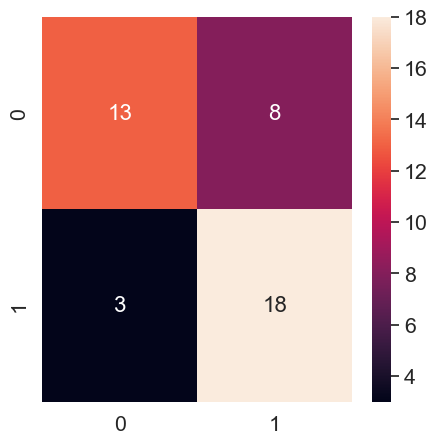

In [147]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [148]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


**Decision Tree Classifier**

In [149]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))
from sklearn.naive_bayes import GaussianNB

Training Accuracy:  1.0
Testing Accuracy:  0.6190476190476191


<Axes: >

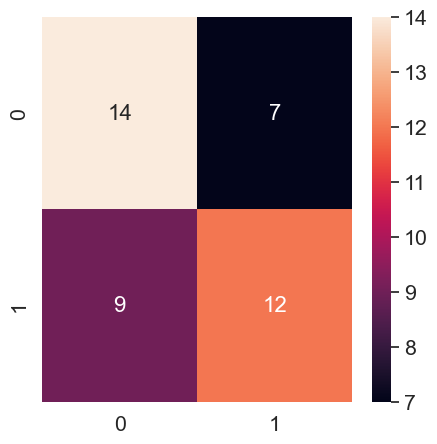

In [150]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [152]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(12/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  54.54545454545454 %


**K-Nearest Neighbors Classifiers**

In [154]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8012048192771084
Testing Accuracy : 0.47619047619047616


<Axes: >

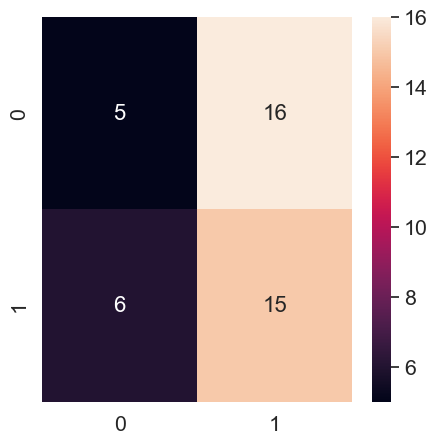

In [155]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [156]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Ada Boost Classifier**

In [157]:
from sklearn.ensemble import AdaBoostClassifier

model  = AdaBoostClassifier()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.6190476190476191


<Axes: >

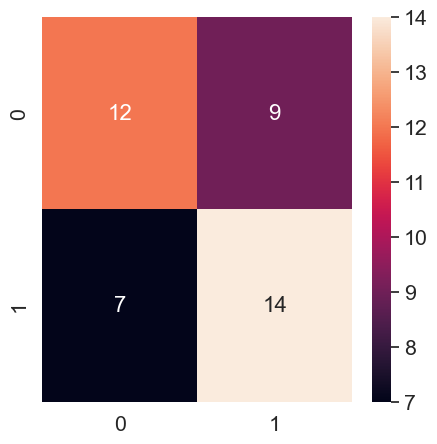

In [158]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [159]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Gradient Boosting Classifier**

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

model  = GradientBoostingClassifier()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8571428571428571


<Axes: >

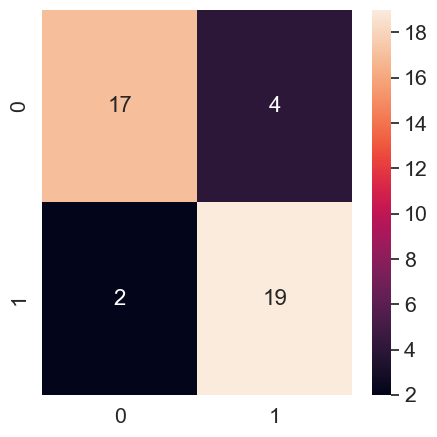

In [162]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale=1.4)#for label size
sns.heatmap(cm, annot = True, annot_kws = {"size": 16})# font size

In [163]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(18/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  81.81818181818183 %


**Xg Boost Classifier**

In [165]:
y_train.replace(to_replace=-1,value=0,inplace=True)

In [166]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)


Selection of metric: Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). This is because the AUPRC is more sensitive to differences between algorithms and their parameter settings rather than the AUROC 

**Hyper Parameter Tuning for Xg-Boost**

In [167]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 10, 5, 7]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [168]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.5903614457831325
Best Parameter:  {'max_depth': 1}


In [173]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

[00:22:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

Training Accuracy : 1.0
Testing Accuracy : 0.47619047619047616


In [181]:
# import matplotlib.pyplot as plt

# xgb.plot_tree(model, num_trees = 0)

# #plt.rcParams['figure.figsize'] = [10, 10]
# plt.title('The Tree related to the Xg-Boost Model', fontsize = 20)
# plt.show()

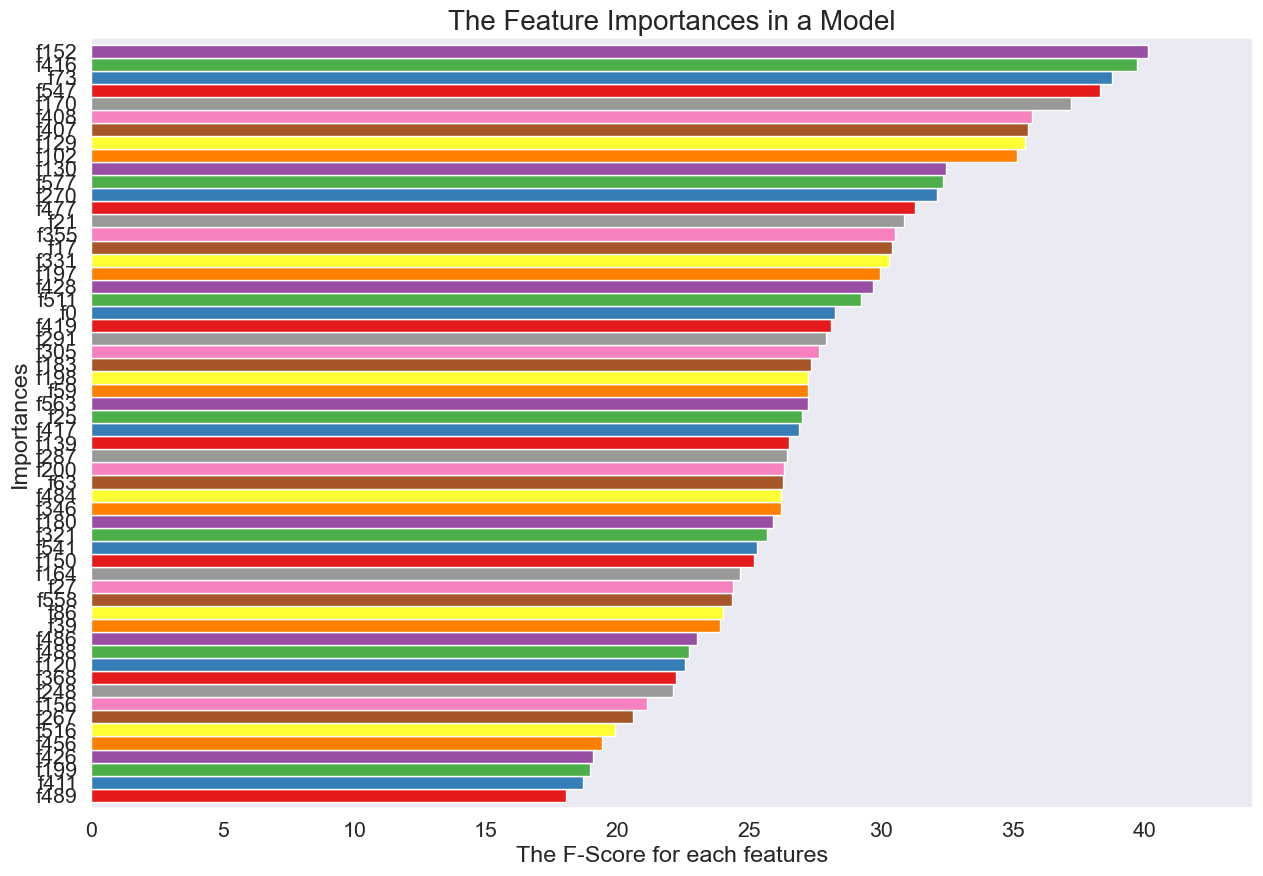

In [182]:
# plotting the feature importances

colors = plt.cm.Set1(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = False, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (30, 40)
plt.title('The Feature Importances in a Model', fontsize = 20)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

From the above feature importance plot we can clearly see that one of the test labelled as test number 140 is highly important in determining a semiconductor test's overall result as pass or fail.

In [183]:
from sklearn.model_selection import learning_curve

weights = (y == 0).sum()/(1.0*(y == -1).sum())
trainSizes, trainScores, crossValScores = learning_curve(XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4,), 
                                                         x_train, y_train, scoring = 'average_precision')

[00:28:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:28:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:28:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:28:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

[00:28:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "s

<Axes: >

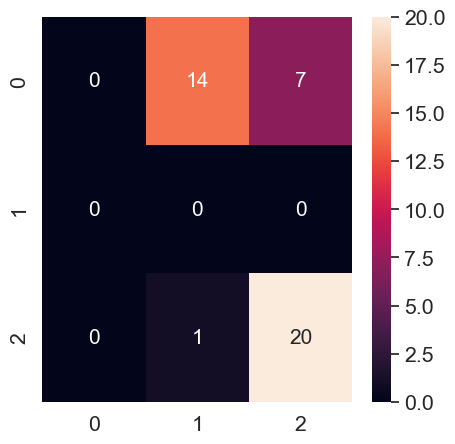

In [184]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [188]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(19/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  86.36363636363636 %


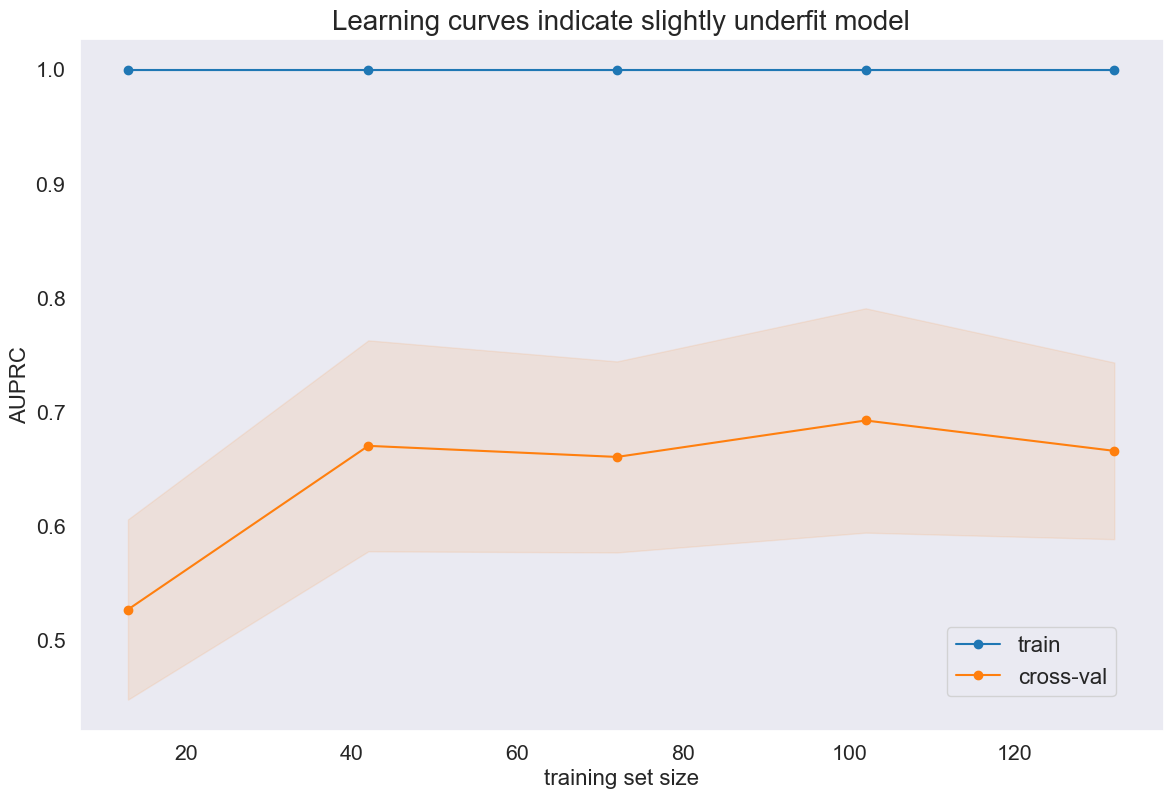

In [186]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd, crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])


plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

In [187]:
from sklearn.metrics import average_precision_score
args = {'max_depth': p1, 'learning_rate': p2, 'booster': p3, 'n_jobs': p4,
        'scale_pos_weight': p5, 'n_estimators': p6}
xgb_clf = xgb.XGBClassifier(**args)
probabilities = model.fit(x_train, y_train.values.ravel()).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

[00:28:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weights" } are not used.

AUPRC = 0.9074620983154145


**Hyper-Parameter Tuning for Naive Bayes Classifier**

In [190]:
from sklearn.naive_bayes import GaussianNB

model  = GaussianNB()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7469879518072289
Testing Accuracy : 0.2857142857142857


In [192]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'priors': [None], 'var_smoothing': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [193]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.5301204819277108
Best Parameter:  {'priors': None, 'var_smoothing': 3.0}


**It is a big Achievement that by using Grid Search CV (Hyper Parameter Tuning) we got such an amazing result that without parameters or by using the default parameters we were getting only 15% accuracy on the test set but now we are getting an whopping 93% accuracy on the test set which is very satisfiable**

In [195]:
from sklearn.naive_bayes import GaussianNB

model  = GaussianNB(priors = None, var_smoothing = 1.0)

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.6265060240963856
Testing Accuracy : 0.14285714285714285


<Axes: >

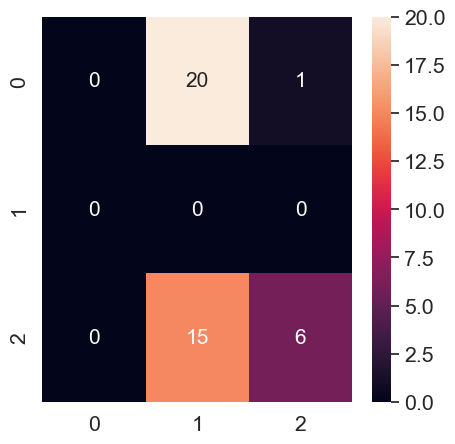

In [196]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [197]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(10/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  45.45454545454545 %


**Hyper Parameter Tuning for Support Vector Classifier**

In [198]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9939759036144579
Testing Accuracy : 0.4523809523809524


In [201]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 0.1, 0.0001, 0.000001], 'kernel': ['linear', 'rbf'], 'gamma': [0.0000001, 0.0001, 0.001, 0.01]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)


grid_search = grid_search.fit(x_train, y_train.values.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [202]:

print("Best Accuracy: ", best_accuracy)
print("Best Parameters :", best_parameters)

Best Accuracy:  0.572289156626506
Best Parameters : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [204]:
from sklearn.svm import SVC

model  = SVC( C = 1, gamma = 0.001, kernel = 'rbf')

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.891566265060241
Testing Accuracy : 0.4523809523809524


<Axes: >

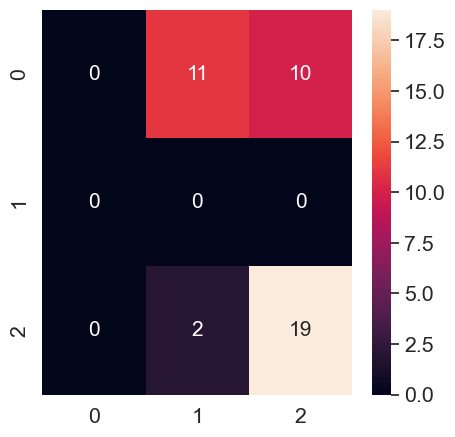

In [205]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [206]:
# While Anamoly detection problems we highly focus on true negatives and false negatives because we do not have any problems with the true positives
# and true positives as they are not the part where we are concerned, we are only focusing on the part that we could successfully take out all the
# true negatives i.e., all the true negatives are predicted to be negative.


Anamoly_accuracy = np.float_(20/22)
print("Anamoly Detection Accuracy: ", Anamoly_accuracy*100,"%")

Anamoly Detection Accuracy:  90.9090909090909 %


In [207]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.64 %


**As, there is no increase in the value of testing accuracy, that means the SVC works good for the default values.**

**Plotting**

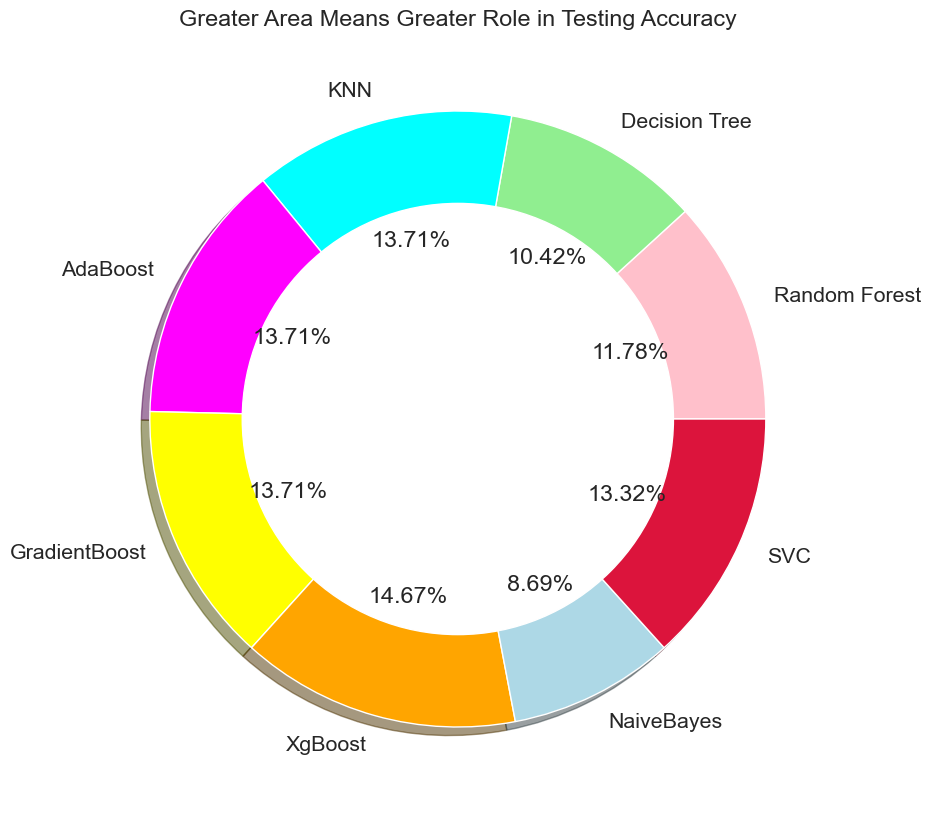

In [208]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "KNN", "AdaBoost", "GradientBoost", "XgBoost", "NaiveBayes", "SVC"
size = [61, 54, 71, 71, 71, 76, 45, 69]
colors = ['pink', 'lightgreen', 'cyan', 'magenta', 'yellow', 'orange', 'lightblue', 'crimson', 'grey']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Testing Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend()
plt.show()

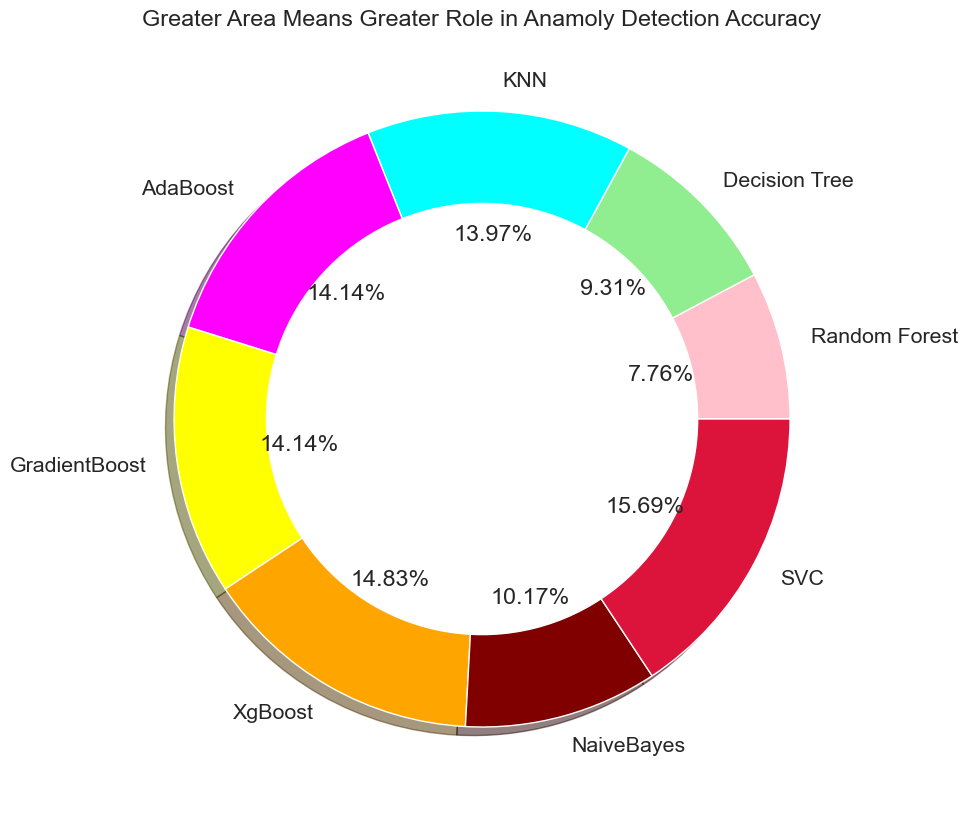

In [209]:
# defining the parameters for a pie chart

labels = "Random Forest", "Decision Tree", "KNN", "AdaBoost", "GradientBoost", "XgBoost", "NaiveBayes", "SVC"
size = [45, 54, 81, 82, 82, 86, 59, 91]
colors = ['pink', 'lightgreen', 'cyan', 'magenta', 'yellow', 'orange', 'maroon', 'crimson', 'lightblue']

# Create a circle for the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Greater Area Means Greater Role in Anamoly Detection Accuracy')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Modelling with Dimensionality Reduction**

In [210]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit(x_train)
print(pca.explained_variance_ratio_)



[6.92736288e-02 5.29590612e-02 3.63523148e-02 3.02665133e-02
 2.78060021e-02 2.56235910e-02 2.45362690e-02 2.26220211e-02
 2.12513718e-02 2.02315380e-02 1.93815132e-02 1.90148242e-02
 1.83192470e-02 1.73275326e-02 1.69526437e-02 1.65330284e-02
 1.56748753e-02 1.50535168e-02 1.46039666e-02 1.42658740e-02
 1.40565009e-02 1.34389537e-02 1.30708018e-02 1.25166975e-02
 1.22017476e-02 1.18848836e-02 1.14541778e-02 1.13398173e-02
 1.11598604e-02 1.05857157e-02 1.02941495e-02 1.01029257e-02
 9.97693433e-03 9.76435844e-03 9.14088302e-03 9.05993921e-03
 8.82092696e-03 8.66144905e-03 8.49216873e-03 8.23826206e-03
 7.98278469e-03 7.79215641e-03 7.51380631e-03 7.38064236e-03
 7.22738597e-03 7.00643600e-03 6.89544466e-03 6.80483843e-03
 6.50338051e-03 6.34404407e-03 6.27578333e-03 6.04096778e-03
 5.82084036e-03 5.69541711e-03 5.64685913e-03 5.48806298e-03
 5.45147253e-03 5.29292821e-03 5.05992181e-03 4.92170915e-03
 4.86558651e-03 4.71033482e-03 4.67689417e-03 4.60330271e-03
 4.39785320e-03 4.217232

After Applying PCA we can clearly see that we can perform Principal Component Analysis (Dimensionality Reduction because all the 590 attributes are not contributing in a big way to the result hence we can undermine the attributes which are less responsible to reach to the result, it will be helpgul for reducing the complexity as the number of columns  is very high.)

**Modelling with Top 28 attributes or components**

In [211]:
# Applying the Dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
pca.fit(x_train)
#print(pca.explained_variance_ratio_)


PCA(n_components=30)

In [213]:
from sklearn.svm import SVC

model  = SVC()

model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9939759036144579
Testing Accuracy : 0.4523809523809524


In [214]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 1)

In [215]:
from sklearn.metrics import average_precision_score

prc = average_precision_score(y_test, y_pred)
print("Precision Recall Score: {0:0.2f}" .format(prc),"%")

Precision Recall Score: 0.64 %


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.64')

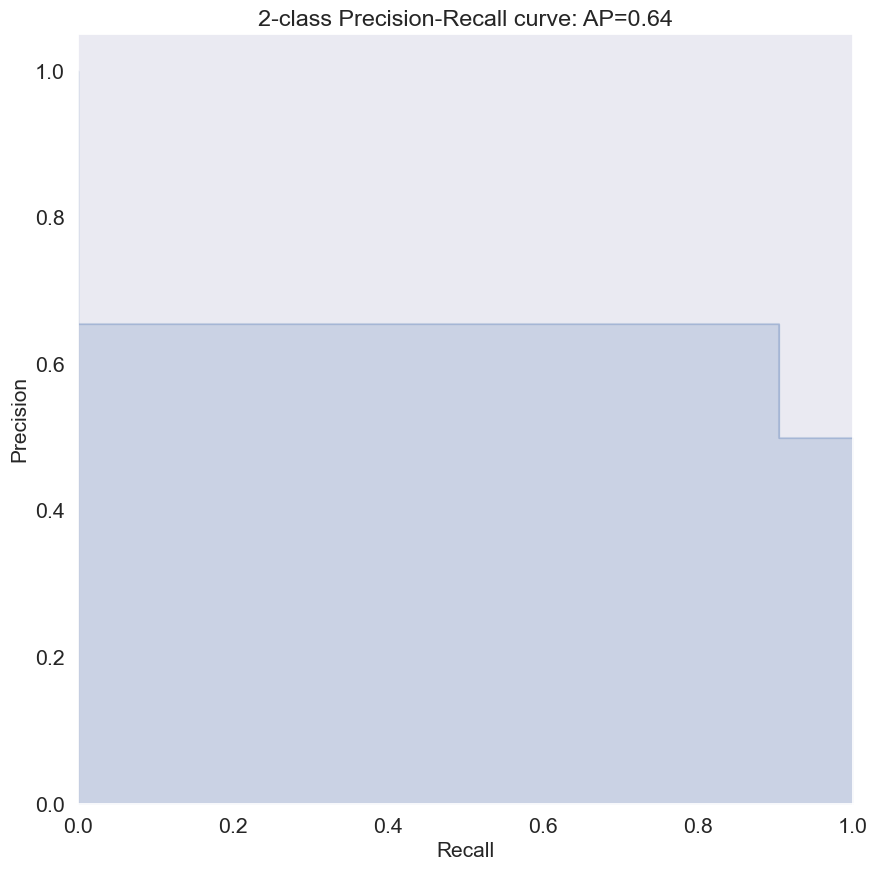

In [217]:
from sklearn.metrics import precision_recall_curve
# from sklearn.utils.fixes import signature
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

#plt.title('Precision Recall Curve for Xg Boost', fontsize = 25)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(prc))
